In [5]:
import pandas as pd
import numpy as np

In [6]:
# # import data
# positif = pd.read_csv('pemilu2024_negative.csv')
# negatif = pd.read_csv('pemilu2024_positive.csv')

In [7]:
# # merge data
# data = pd.concat([positif, negatif])

In [8]:
data = pd.read_csv("pemilu2024c_.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24135 entries, 0 to 24134
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tanggal                  24135 non-null  object 
 1   waktu                    24135 non-null  object 
 2   username                 24135 non-null  object 
 3   quote_count              24135 non-null  int64  
 4   reply_count              24135 non-null  int64  
 5   retweet_count            24135 non-null  int64  
 6   favorite_count           24135 non-null  int64  
 7   steming_data             24098 non-null  object 
 8   translated_steming_data  24135 non-null  object 
 9   sentiment_polarity       24135 non-null  float64
 10  sentiment                24135 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.0+ MB


In [9]:
# drop duplicate data
data_final = data[['sentiment', 'steming_data']].dropna()
data_final.sentiment.value_counts()

sentiment
negatif    13796
positif    10302
Name: count, dtype: int64

In [10]:
data_final['sentiment'] = data_final.sentiment.map({'positif': 1, 'negatif': 0})

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [12]:
x = data_final.steming_data
y = data_final['sentiment']

In [13]:
# vectorizing
vec = CountVectorizer().fit(x)
x_features = vec.get_feature_names_out()
x_vec = vec.transform(x)
tfidf = TfidfTransformer().fit(x_vec)
tfidf_data = tfidf.transform(x_vec)

In [14]:
print(tfidf_data)
print('Shape of Spare Matrix : ', tfidf_data.shape)
print('Amount of Non-Zero occurences : ', tfidf_data.nnz)

  (0, 19697)	0.3566509379872837
  (0, 16970)	0.36722451381612226
  (0, 16932)	0.2153371788978142
  (0, 16699)	0.17310588617787914
  (0, 16146)	0.3034703297767129
  (0, 14780)	0.3484494354034458
  (0, 10097)	0.519308051100296
  (0, 5186)	0.36722451381612226
  (0, 1848)	0.15653878759060696
  (0, 869)	0.13805860656629193
  (1, 21381)	0.1138030737677894
  (1, 20969)	0.1609765581771452
  (1, 19697)	0.3969120263117456
  (1, 19522)	0.19016355163893583
  (1, 19221)	0.20433960823523695
  (1, 17752)	0.19016355163893583
  (1, 16970)	0.20433960823523695
  (1, 16932)	0.11982292335879642
  (1, 16699)	0.09632360486291805
  (1, 16146)	0.1688640217756324
  (1, 14780)	0.38778468452562026
  (1, 14050)	0.1984560131558728
  (1, 14040)	0.17598749504263472
  (1, 10097)	0.28896546859715694
  (1, 8540)	0.21263206975217394
  :	:
  (24094, 11359)	0.1282405804856438
  (24094, 10060)	0.2452054228985081
  (24094, 7845)	0.2452054228985081
  (24094, 6729)	0.41529701321323353
  (24094, 6032)	0.1343457674680164
  (2409

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tfidf_data, y, test_size=0.2, random_state=1)

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [17]:
y_result = model.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_result))
print(" ")

print("classification Report: ")
print(classification_report(y_test, y_result))

[[2414  364]
 [ 496 1546]]
 
classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2778
           1       0.81      0.76      0.78      2042

    accuracy                           0.82      4820
   macro avg       0.82      0.81      0.82      4820
weighted avg       0.82      0.82      0.82      4820



In [19]:
accuracy_rf = accuracy_score(y_test, y_result)
print(f'Accuracy Random Forest: {accuracy_rf:.2f}')

Accuracy Random Forest: 0.82


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

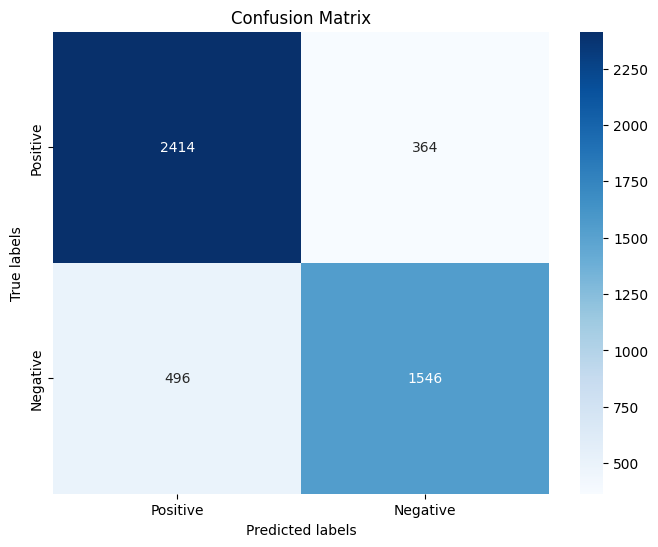

In [21]:
cm = confusion_matrix(y_test, y_result)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Menghitung akurasi pelatihan
train_accuracy_rf = model.score(x_train, y_train)

# Memprediksi label untuk data uji
y_pred = model.predict(x_test)

validation_accuracy_rf = accuracy_score(y_test, y_pred)

print(f'\nAkurasi Pelatihan Random Forest: {train_accuracy_rf:.2f}')
print(f'Akurasi Validasi Random Forest: {validation_accuracy_rf:.2f}')


Akurasi Pelatihan Random Forest: 1.00
Akurasi Validasi Random Forest: 0.82


In [23]:
import pickle

# Simpan model ke file
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Simpan vectorizer
with open('vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vec, vec_file)

# Simpan tfidf transformer
with open('tfidf_transformer.pkl', 'wb') as tfidf_file:
    pickle.dump(tfidf, tfidf_file)

In [ ]:
from flask import Flask, request, jsonify
import pickle
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Load model
with open('random_forest_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Load vectorizer and tfidf transformer
with open('vectorizer.pkl', 'rb') as vec_file:
    vec = pickle.load(vec_file)

with open('tfidf_transformer.pkl', 'rb') as tfidf_file:
    tfidf = pickle.load(tfidf_file)

app = Flask(__name__)

@app.route('/', methods=['GET'])
def cek():
  return jsonify("sukses")
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    text = data['text']

    # Transform input text
    x_vec = vec.transform([text])
    tfidf_data = tfidf.transform(x_vec)

    # Predict sentiment
    prediction = model.predict(tfidf_data)
    sentiment = 'positif' if prediction[0] == 1 else 'negatif'

    return jsonify({'sentiment': sentiment})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
